<a href="https://colab.research.google.com/github/kalehariprasad/customer-shopping-price/blob/main/notebook/customer_shopping_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##About Dataset

Predict the cost to ship the sculptures
It can be difficult to navigate the logistics when it comes to buying art. These include, but are not limited to, the following:


Effective collection management

Shipping the paintings, antiques, sculptures, and other collectibles to their respective destinations after purchase
Though many companies have made shipping consumer goods a relatively quick and painless procedure, the same rules do not always apply while shipping paintings or transporting antiques and collectibles.

##Task
You work for a company that sells sculptures that are acquired from various artists around the world. Your task is to predict the cost required to ship these sculptures to customers based on the information provided in the dataset.

Customer Id                -      Represents the unique identification

number of the customers
Artist Name                  -   Represents the name of the artist

Artist Reputation             -   Represents the reputation of an artist  in the market(the greater the reputation value, the higher the reputation of the artist in the market)

Height                         -  Represents the height of the sculpture

Width                          - Represents the width of the sculpture

Weight                         -Represents the  weight of the sculpture

Material                       -Represents the material that the sculpture

is made of
Price Of Sculpture             -  Represents the price of the sculpture

Base Shipping Price            -  Represents the base price for shipping a sculpture

International                  - Represents whether the shipping is international
Express Shipment               - Represents whether the shipping was in

the express (fast) mode
Installation Included          - Represents whether the order had installation included in the purchase of the sculpture

Transport                      - Represents the mode of transport of the order

Fragile                        -  Represents whether the order is fragile

Customer Information           -  Represents  details about a customer

Remote Location                - Represents whether the customer resides in a remote location

Scheduled Date                 - Represents the date when the order was placed

Delivery Date                  - Represents the date of delivery of the order

Customer Location              - Represents the location of the customer
Cost                             Represents the cost of the order

##importing libraries and reading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [2]:
train_df=pd.read_csv('/content/drive/MyDrive/HackerEarth Machine Learning : Exhibit A(rt)/train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/HackerEarth Machine Learning : Exhibit A(rt)/test.csv')
sample_submission_df=pd.read_csv('/content/drive/MyDrive/HackerEarth Machine Learning : Exhibit A(rt)/sample_submission.csv')

In [3]:
train_df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [4]:
test_df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481"
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253"
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,"Antonioborough, AL 54778"
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,"Lake Frances, LA 03040"


##basic checks

In [5]:
train_df.shape

(6500, 20)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [7]:
def Null_percent(df):
  null_info = []

  for column in df.columns:
      null_count = df[column].isnull().sum()
      null_count_percent = round(df[column].isnull().mean()*100,2)
      if null_count > 0:
          null_info.append({'Column Name': column,
                            'dtype': df[column].dtype, 'Null Count': null_count,
                            'Null Count Percent': null_count_percent,})

  result_df = pd.DataFrame(null_info)

  return result_df

In [8]:
Null_percent(train_df)

,Column Name,dtype,Null Count,Null Count Percent
0,Artist Reputation,float64,750,11.54
1,Height,float64,375,5.77
2,Width,float64,584,8.98
3,Weight,float64,587,9.03
4,Material,object,764,11.75
5,Transport,object,1392,21.42
6,Remote Location,object,771,11.86


In [9]:
def ChangeDatatype(df):
  df['Scheduled Date']=pd.to_datetime(df['Scheduled Date'])
  df['Delivery Date']=pd.to_datetime(df['Delivery Date'])
  if 'Cost' in df.columns:
    df['Cost']=df['Cost'].abs()# for removing negitive sign from the cost column because cost has some values in negitive .but price will not be in negitive
  return df

In [10]:
ChangeDatatype(df=train_df)
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Id            6500 non-null   object        
 1   Artist Name            6500 non-null   object        
 2   Artist Reputation      5750 non-null   float64       
 3   Height                 6125 non-null   float64       
 4   Width                  5916 non-null   float64       
 5   Weight                 5913 non-null   float64       
 6   Material               5736 non-null   object        
 7   Price Of Sculpture     6500 non-null   float64       
 8   Base Shipping Price    6500 non-null   float64       
 9   International          6500 non-null   object        
 10  Express Shipment       6500 non-null   object        
 11  Installation Included  6500 non-null   object        
 12  Transport              5108 non-null   object        
 13  Fra

In [11]:
cat_cols_df=train_df.select_dtypes(include='object')
num_cols_df=train_df.select_dtypes(exclude='object')
cat_cols_df



,Customer Id,Artist Name,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Customer Location
0,fffe3900350033003300,Billy Jenkins,Brass,Yes,Yes,No,Airways,No,Working Class,No,"New Michelle, OH 50777"
1,fffe3800330031003900,Jean Bryant,Brass,No,No,No,Roadways,No,Working Class,No,"New Michaelport, WY 12072"
2,fffe3600370035003100,Laura Miller,Clay,No,No,No,Roadways,Yes,Working Class,Yes,"Bowmanshire, WA 19241"
3,fffe350031003300,Robert Chaires,Aluminium,No,No,No,NaN,No,Wealthy,Yes,"East Robyn, KY 86375"
4,fffe3900320038003400,Rosalyn Krol,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,"Aprilside, PA 52793"
...,...,...,...,...,...,...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes,"New Robert, VT 85335"
6496,fffe310036003400,Larry Edwards,NaN,No,No,No,Roadways,No,Working Class,No,"New Joshua, VA 35766"
6497,fffe3600300031003300,Denise Worth,Clay,Yes,No,No,NaN,Yes,Wealthy,No,"Lake Kelly, MA 80823"
6498,fffe3600350035003900,Daniel Drew,Stone,No,Yes,No,Roadways,No,Working Class,Yes,"Hintonberg, UT 35006"


In [12]:
num_cols_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Artist Reputation    5750 non-null   float64       
 1   Height               6125 non-null   float64       
 2   Width                5916 non-null   float64       
 3   Weight               5913 non-null   float64       
 4   Price Of Sculpture   6500 non-null   float64       
 5   Base Shipping Price  6500 non-null   float64       
 6   Scheduled Date       6500 non-null   datetime64[ns]
 7   Delivery Date        6500 non-null   datetime64[ns]
 8   Cost                 6500 non-null   float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 457.2 KB


In [13]:
#droping  unrequired cat cols
cat_cols_df=cat_cols_df.drop(['Customer Id'],axis=1)


In [14]:
# function for printing unique columns for each categorical columns
def GetUnique(df):
  for col in df :
    print(f'unqique values for  {col } is {df[col].unique()} and total {len(df[col].unique())}')


In [15]:
GetUnique(df=cat_cols_df)

unqique values for  Artist Name is ['Billy Jenkins' 'Jean Bryant' 'Laura Miller' ... 'Denise Worth'
 'Daniel Drew' 'Vernon Carroll'] and total 6449
unqique values for  Material is ['Brass' 'Clay' 'Aluminium' 'Wood' 'Marble' 'Bronze' 'Stone' nan] and total 8
unqique values for  International is ['Yes' 'No'] and total 2
unqique values for  Express Shipment is ['Yes' 'No'] and total 2
unqique values for  Installation Included is ['No' 'Yes'] and total 2
unqique values for  Transport is ['Airways' 'Roadways' nan 'Waterways'] and total 4
unqique values for  Fragile is ['No' 'Yes'] and total 2
unqique values for  Customer Information is ['Working Class' 'Wealthy'] and total 2
unqique values for  Remote Location is ['No' 'Yes' nan] and total 3
unqique values for  Customer Location is ['New Michelle, OH 50777' 'New Michaelport, WY 12072'
 'Bowmanshire, WA 19241' ... 'Lake Kelly, MA 80823' 'Hintonberg, UT 35006'
 'New Christopher, AK 87406'] and total 6500


Since Artist Name and Customer Location columns have more uniquie values i am droping theese two columns also

In [16]:
cat_cols_df=cat_cols_df.drop(['Artist Name','Customer Location'],axis=1)

In [17]:
# printing unique columns for each categorical columns after droping 'Artist Name','Customer Location' columns
for col in cat_cols_df :
  print(f'unqique values for  {col } is {cat_cols_df[col].unique()} and total {len(cat_cols_df[col].unique())}')

unqique values for  Material is ['Brass' 'Clay' 'Aluminium' 'Wood' 'Marble' 'Bronze' 'Stone' nan] and total 8
unqique values for  International is ['Yes' 'No'] and total 2
unqique values for  Express Shipment is ['Yes' 'No'] and total 2
unqique values for  Installation Included is ['No' 'Yes'] and total 2
unqique values for  Transport is ['Airways' 'Roadways' nan 'Waterways'] and total 4
unqique values for  Fragile is ['No' 'Yes'] and total 2
unqique values for  Customer Information is ['Working Class' 'Wealthy'] and total 2
unqique values for  Remote Location is ['No' 'Yes' nan] and total 3


In [18]:
num_cols_df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.883983e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.405307e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,8.607000e+01
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,2.267950e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,4.581550e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.366273e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [19]:
num_cols_df.corr()

<ipython-input-19-9823fc8bb5f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_cols_df.corr()


,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.071991
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.114737
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.166999
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.438959
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.491871
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.059591
Cost,0.071991,0.114737,0.166999,0.438959,0.491871,0.059591,1.000000


In [20]:
correlation_matrix = num_cols_df.corr(numeric_only=True) * 100
correlation_matrix[correlation_matrix > 70]



,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,100.0,NaN,NaN,NaN,NaN,NaN,NaN
Height,NaN,100.000000,76.837645,NaN,NaN,NaN,NaN
Width,NaN,76.837645,100.000000,NaN,NaN,NaN,NaN
Weight,NaN,NaN,NaN,100.000000,89.020509,NaN,NaN
Price Of Sculpture,NaN,NaN,NaN,89.020509,100.000000,NaN,NaN
Base Shipping Price,NaN,NaN,NaN,NaN,NaN,100.0,NaN
Cost,NaN,NaN,NaN,NaN,NaN,NaN,100.0


Height and Width columns & Weight and Price of Sculpture has correalation more than 70 % positively

<ipython-input-21-e70ff4f8782c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(num_cols_df.corr(),annot=True)


<Axes: >

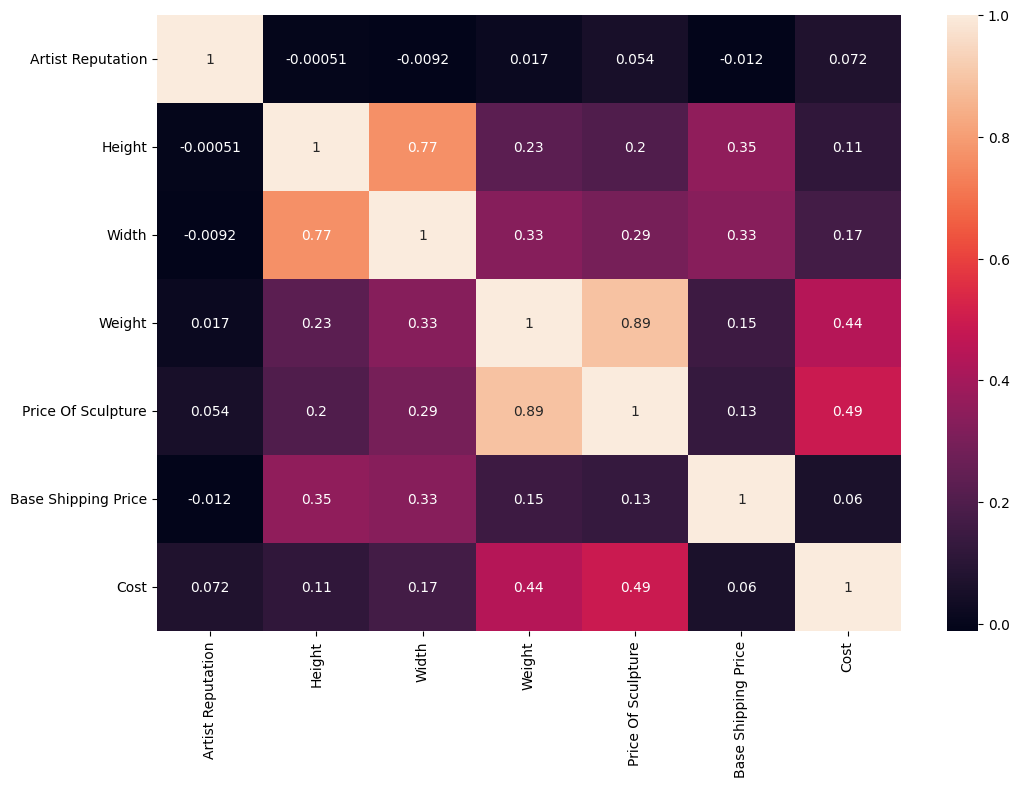

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(num_cols_df.corr(),annot=True)

##EDA

In [22]:
class Distribution_Outliers:
  def __init__(self):
    pass

  def Distribution(self,df):  # function to check distribution for each column
    for col in df.columns:
        if df[col].dtype == 'object':

            print(f"Value counts for column '{col}':")
            print(df[col].value_counts())
            print("\n")
        else:

            plt.figure(figsize=(8, 6))
            sns.histplot(x=col, bins=20,data=df, kde=True)
            plt.title(f"Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.show()
  def detect_and_visualize_outliers(self,df): # detectcting outliers and visualing  outliers
      for col in df.columns:
        if  df[col].dtype != 'object' and df[col].dtype != 'datetime64[ns]':
            plt.figure(figsize=(8, 6))

            sns.boxplot(x=df[col])

            plt.title(f"Outliers in '{col}'")
            plt.xlabel(col)
            plt.show()
  def outliers_removal(self,df): #removing outliers
    new_df_cap = df.copy()

    for col in new_df_cap.columns:
        if new_df_cap[col].dtype != 'object' and new_df_cap[col].dtype != 'datetime64[ns]':
            percentile25 = new_df_cap[col].quantile(0.25)
            percentile75 = new_df_cap[col].quantile(0.75)
            iqr = percentile75 - percentile25
            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr

            new_df_cap[col] = np.where(
                new_df_cap[col] > upper_limit,
                upper_limit,
                np.where(
                    new_df_cap[col] < lower_limit,
                    lower_limit,
                    new_df_cap[col]
                )
            )

    return new_df_cap


In [23]:
train_df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",159.23


In [24]:
train_df.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

In [25]:
#creating instance for Distribution_Outliers() class
distribution_outlier=Distribution_Outliers()

Value counts for column 'Customer Id':
fffe3900350033003300    1
fffe3200330037003200    1
fffe3500300034003800    1
fffe3200310034003900    1
fffe3400360039003700    1
                       ..
fffe3500360030003400    1
fffe3300370039003200    1
fffe3900350031003200    1
fffe3200320034003300    1
fffe3700310031003600    1
Name: Customer Id, Length: 6500, dtype: int64


Value counts for column 'Artist Name':
John Brown        4
James White       3
Robert Davis      3
James Moore       3
Mary Peterson     2
                 ..
Jason Gessel      1
Sandra Harrod     1
Edward Balder     1
Denise Rhodes     1
Vernon Carroll    1
Name: Artist Name, Length: 6449, dtype: int64




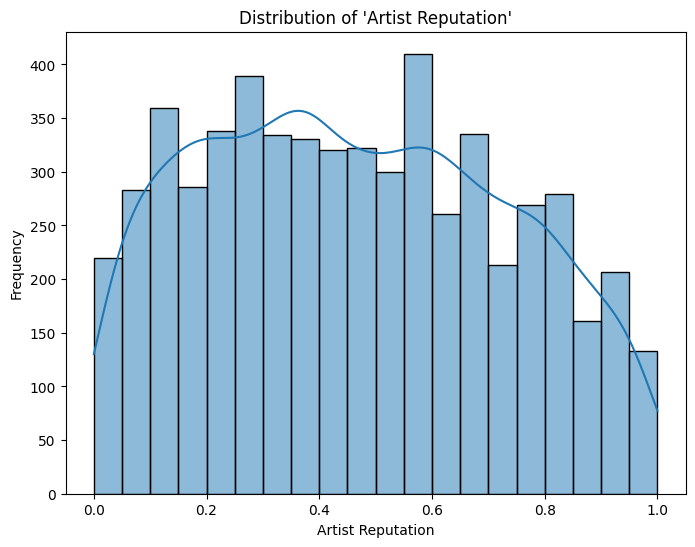

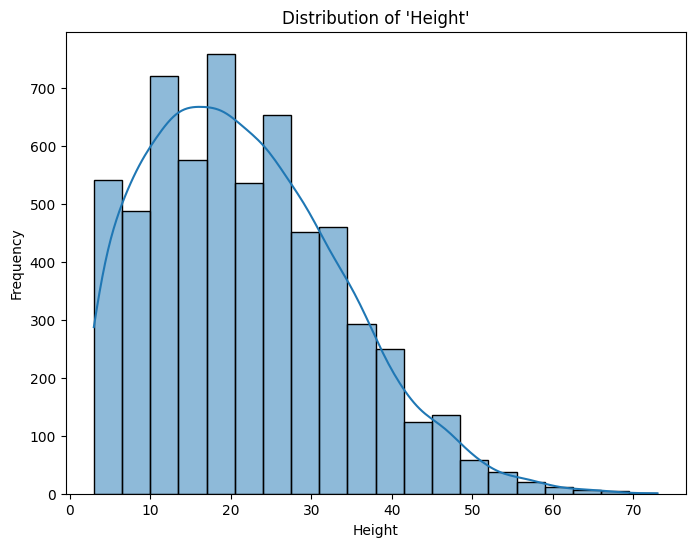

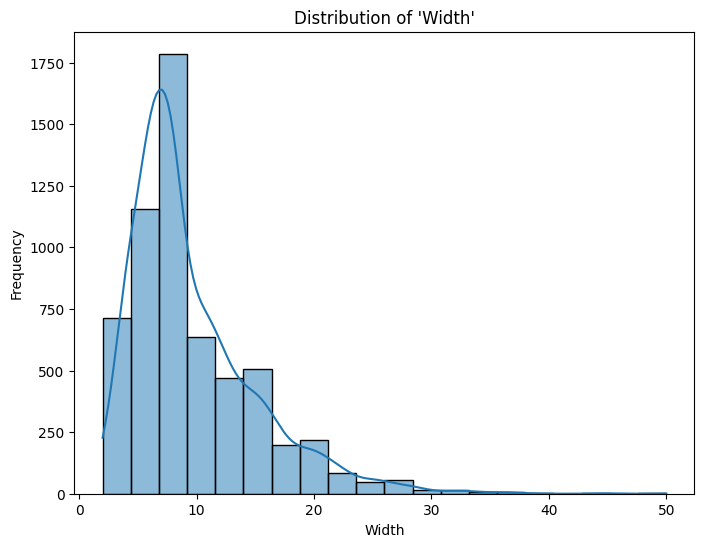

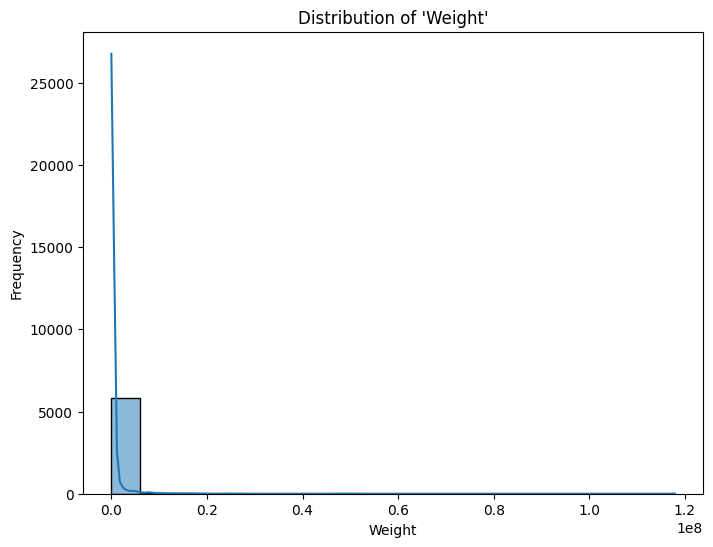

Value counts for column 'Material':
Brass        847
Aluminium    845
Bronze       821
Marble       819
Clay         816
Wood         816
Stone        772
Name: Material, dtype: int64




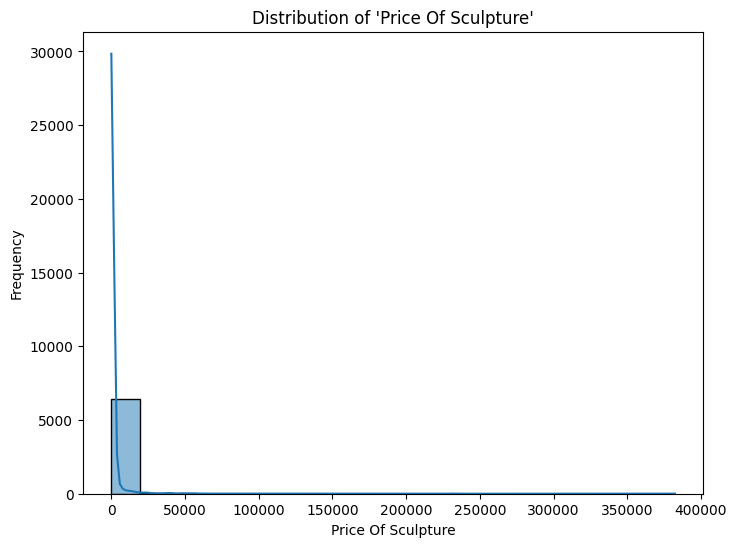

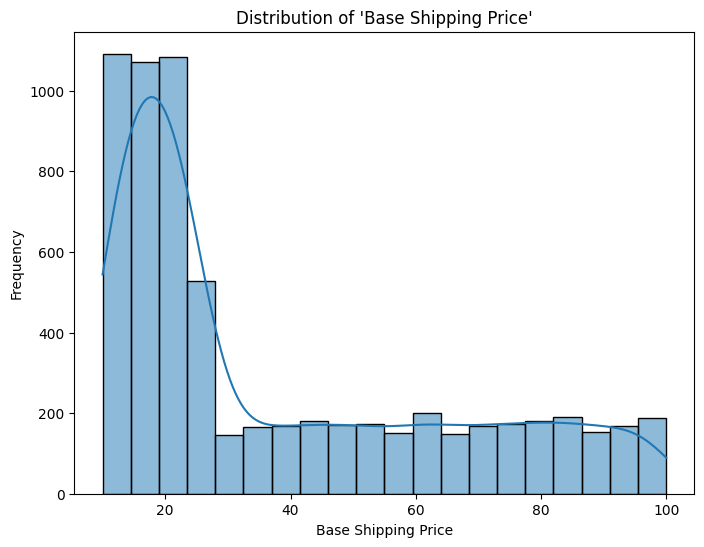

Value counts for column 'International':
No     4294
Yes    2206
Name: International, dtype: int64


Value counts for column 'Express Shipment':
No     4365
Yes    2135
Name: Express Shipment, dtype: int64


Value counts for column 'Installation Included':
No     3916
Yes    2584
Name: Installation Included, dtype: int64


Value counts for column 'Transport':
Roadways     2064
Airways      1817
Waterways    1227
Name: Transport, dtype: int64


Value counts for column 'Fragile':
No     5461
Yes    1039
Name: Fragile, dtype: int64


Value counts for column 'Customer Information':
Working Class    4803
Wealthy          1697
Name: Customer Information, dtype: int64


Value counts for column 'Remote Location':
No     4594
Yes    1135
Name: Remote Location, dtype: int64




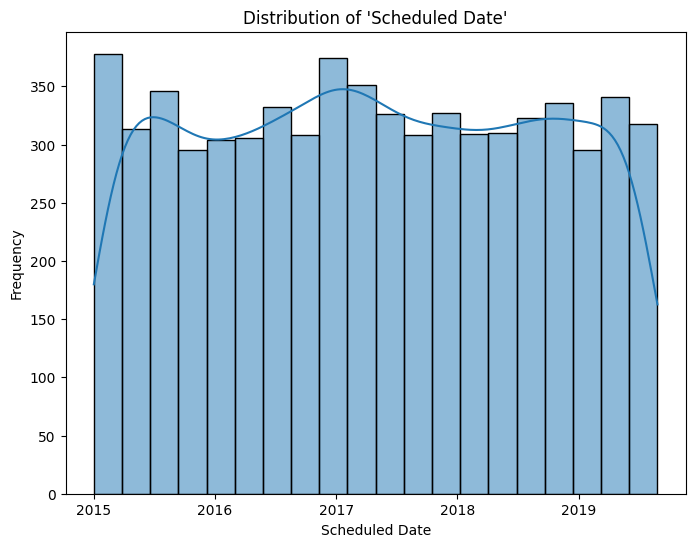

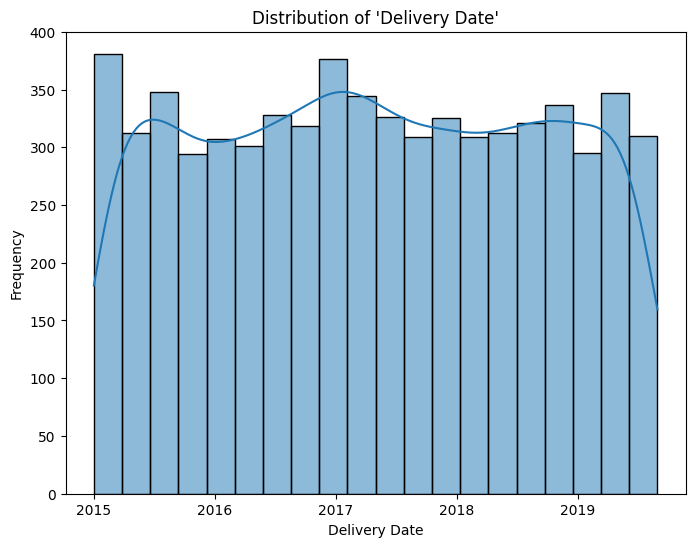

Value counts for column 'Customer Location':
New Michelle, OH 50777          1
Lake Johnny, MI 27289           1
East Emily, NY 91585            1
Brittneyview, PA 95720          1
Dominguezchester, KY 97127      1
                               ..
Karenmouth, WY 67680            1
Wilsontown, NY 95913            1
New Stephanieport, HI 74286     1
South Mitchellside, WV 80906    1
New Christopher, AK 87406       1
Name: Customer Location, Length: 6500, dtype: int64




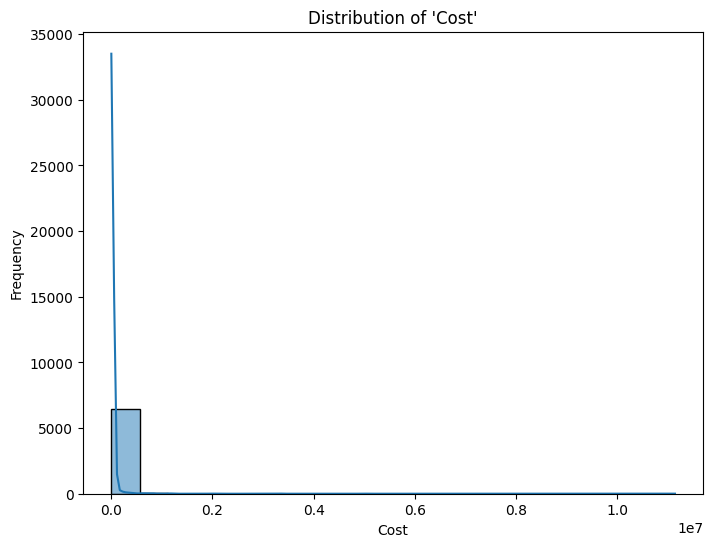

In [26]:
distribution_outlier.Distribution(train_df)

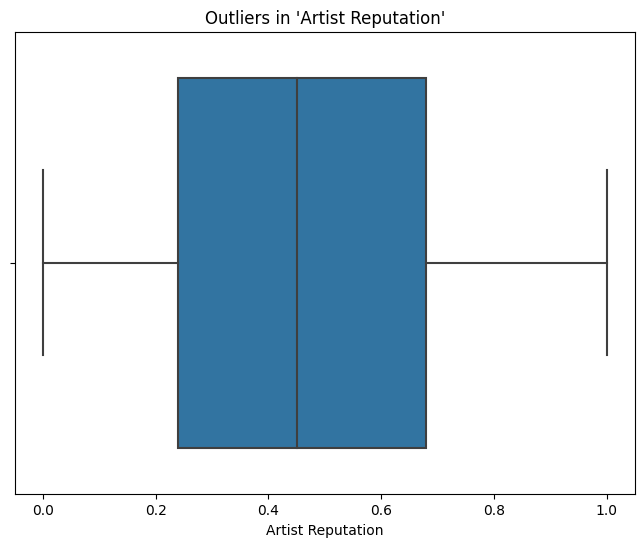

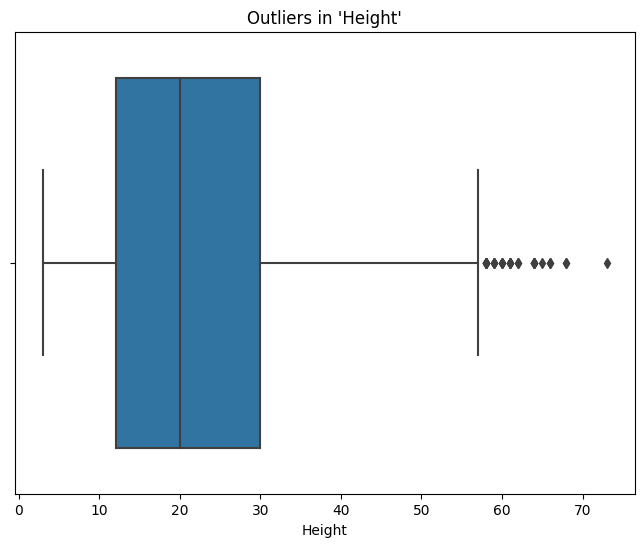

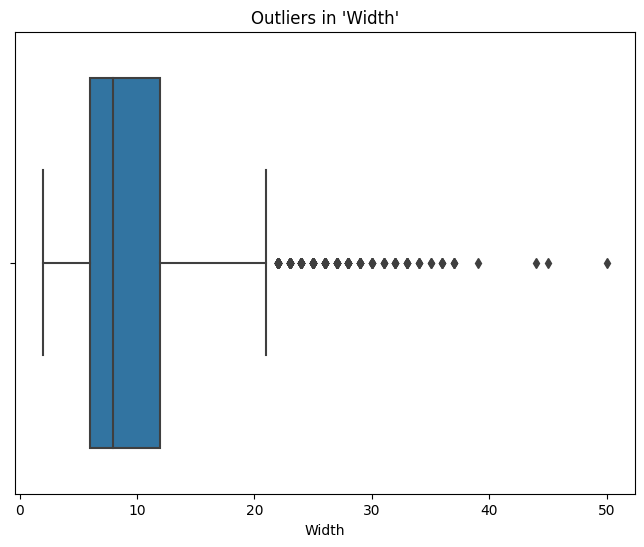

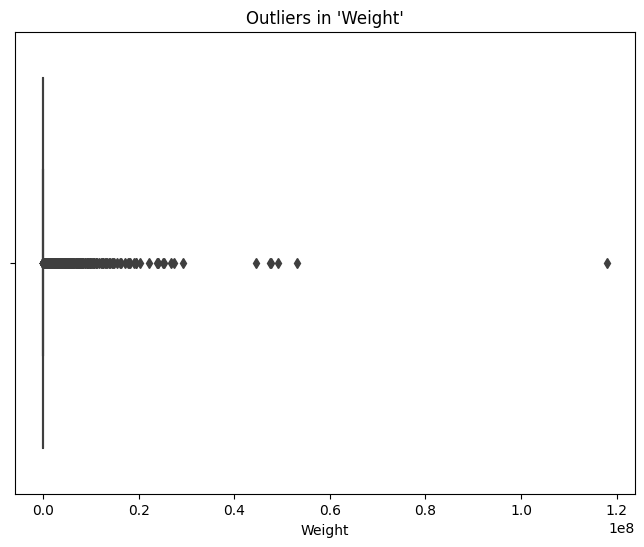

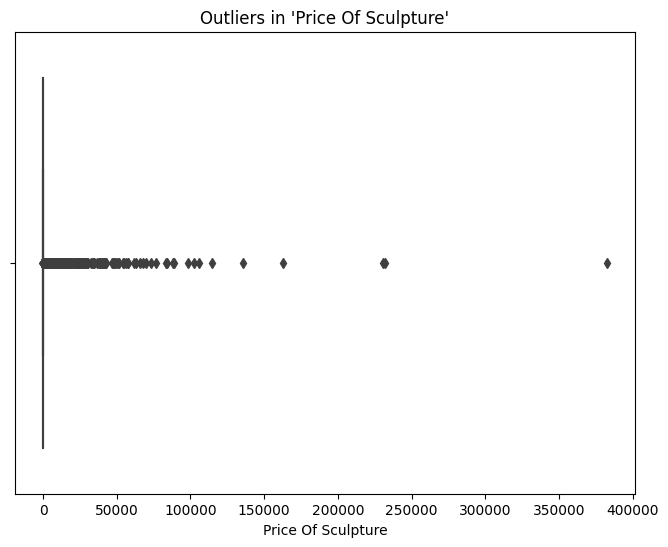

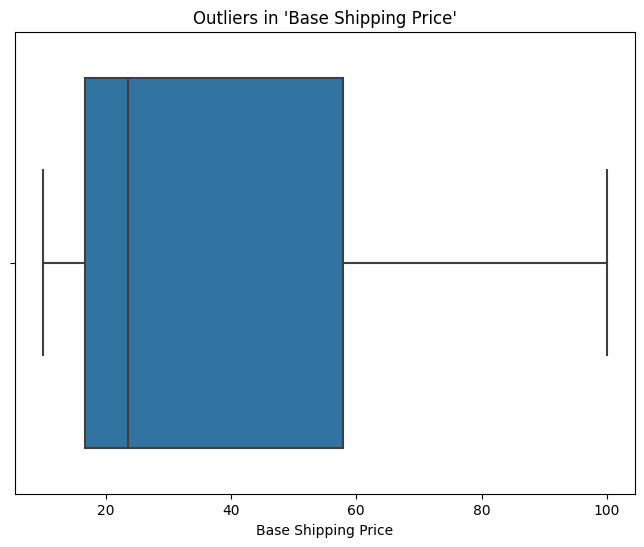

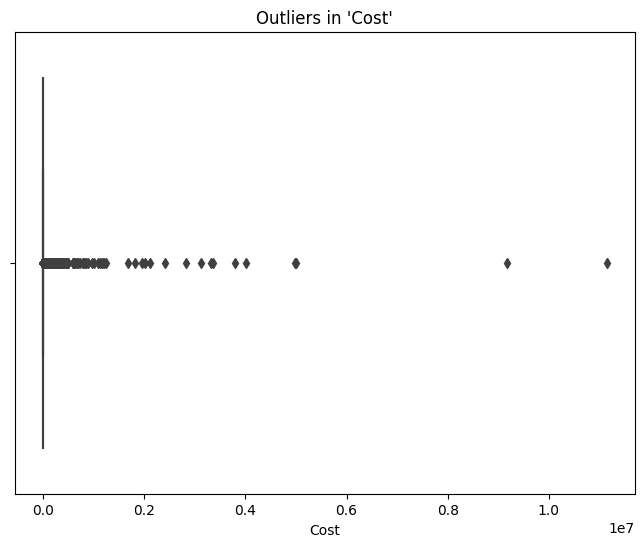

In [27]:
distribution_outlier.detect_and_visualize_outliers(df=train_df)

Because of extreem high values boxplot is unable to interpret the values so capping the outliers after capping outliers distribution may change bacuase i am replacing outlires with upper limit using the IQR method

In [28]:
train_df1=distribution_outlier.outliers_removal(df=train_df)

In [29]:
train_df1


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",283.29000
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",159.96000
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",154.29000
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",161.16000
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",159.23000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,2018-03-28,2018-03-25,"New Robert, VT 85335",872.43000
6496,fffe310036003400,Larry Edwards,0.67,15.0,NaN,18981.0,NaN,67.18,27.72,No,No,No,Roadways,No,Working Class,No,2015-08-29,2015-08-27,"New Joshua, VA 35766",1347.02000
6497,fffe3600300031003300,Denise Worth,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,NaN,Yes,Wealthy,No,2019-04-10,2019-04-09,"Lake Kelly, MA 80823",354.55000
6498,fffe3600350035003900,Daniel Drew,0.02,33.0,9.0,90385.5,Stone,215.83,69.76,No,Yes,No,Roadways,No,Working Class,Yes,2019-03-10,2019-03-12,"Hintonberg, UT 35006",3075.48875


In [30]:
train_df1.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5913.000000,6500.000000,6500.000000,6500.000000
mean,0.461850,21.742204,9.422245,23874.457467,59.060894,37.407174,987.375848
std,0.265781,11.889541,4.808931,34963.000222,82.569354,26.873519,1055.580991
min,0.000000,3.000000,2.000000,3.000000,3.000000,10.000000,86.070000
25%,0.240000,12.000000,6.000000,503.000000,5.230000,16.700000,226.795000
50%,0.450000,20.000000,8.000000,3102.000000,8.025000,23.505000,458.155000
75%,0.680000,30.000000,12.000000,36456.000000,89.470000,57.905000,1366.272500
max,1.000000,57.000000,21.000000,90385.500000,215.830000,99.980000,3075.488750


Value counts for column 'Customer Id':
fffe3900350033003300    1
fffe3200330037003200    1
fffe3500300034003800    1
fffe3200310034003900    1
fffe3400360039003700    1
                       ..
fffe3500360030003400    1
fffe3300370039003200    1
fffe3900350031003200    1
fffe3200320034003300    1
fffe3700310031003600    1
Name: Customer Id, Length: 6500, dtype: int64


Value counts for column 'Artist Name':
John Brown        4
James White       3
Robert Davis      3
James Moore       3
Mary Peterson     2
                 ..
Jason Gessel      1
Sandra Harrod     1
Edward Balder     1
Denise Rhodes     1
Vernon Carroll    1
Name: Artist Name, Length: 6449, dtype: int64




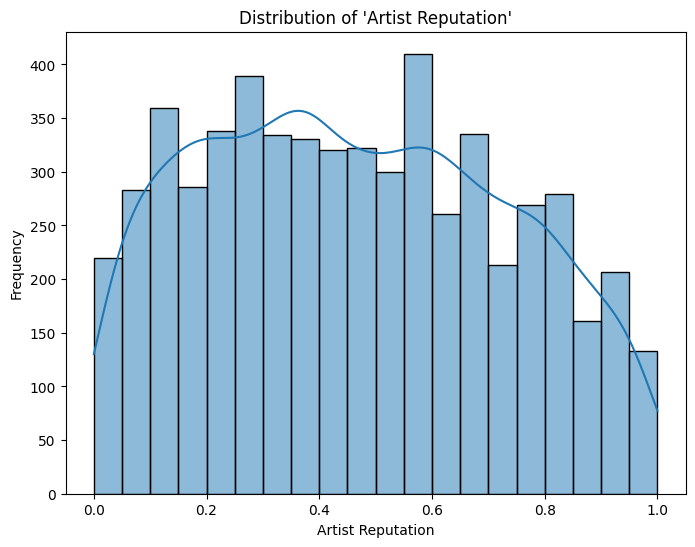

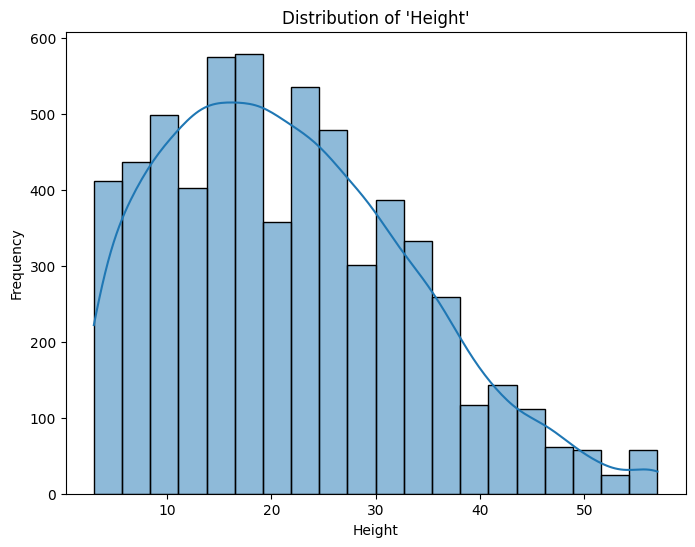

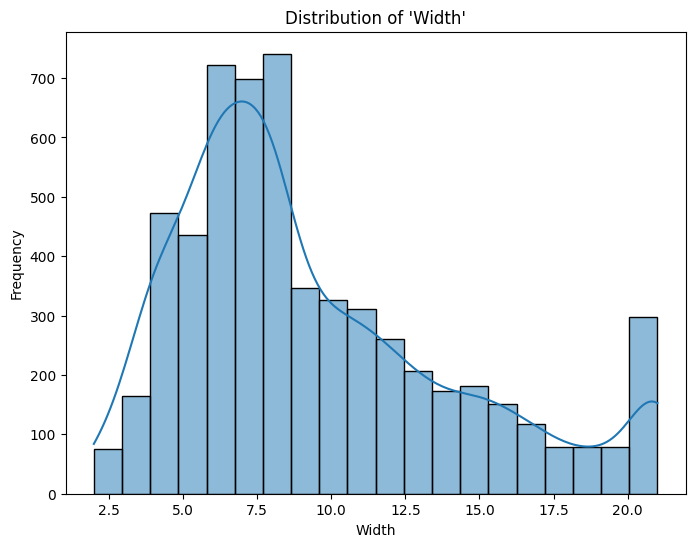

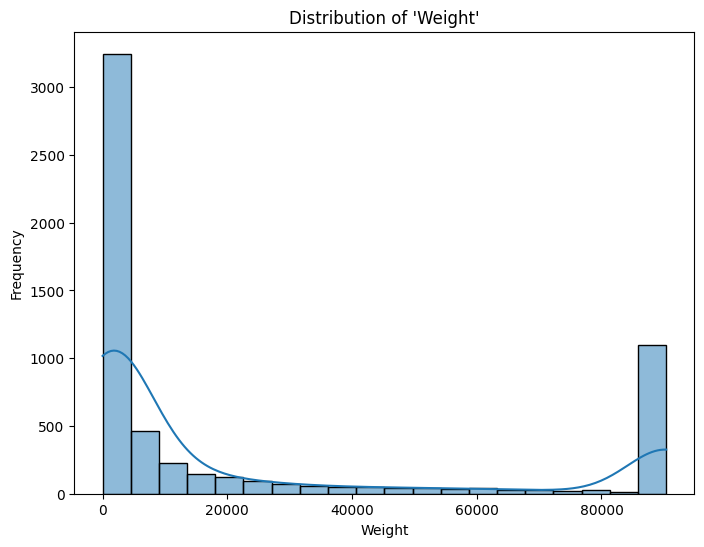

Value counts for column 'Material':
Brass        847
Aluminium    845
Bronze       821
Marble       819
Clay         816
Wood         816
Stone        772
Name: Material, dtype: int64




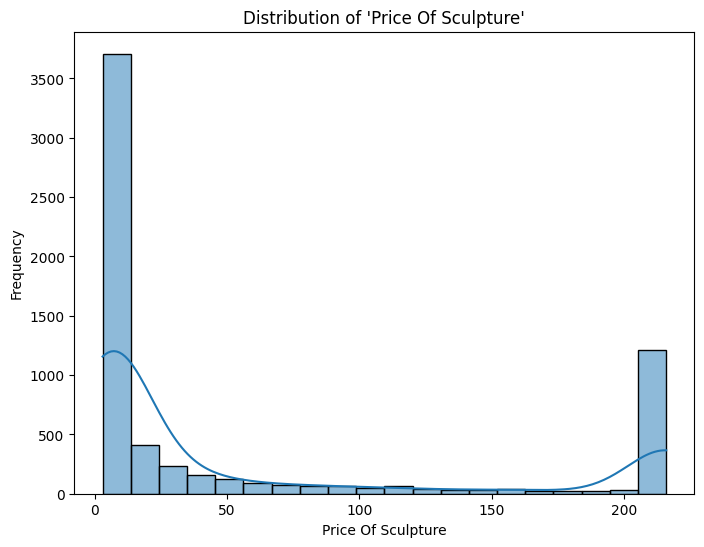

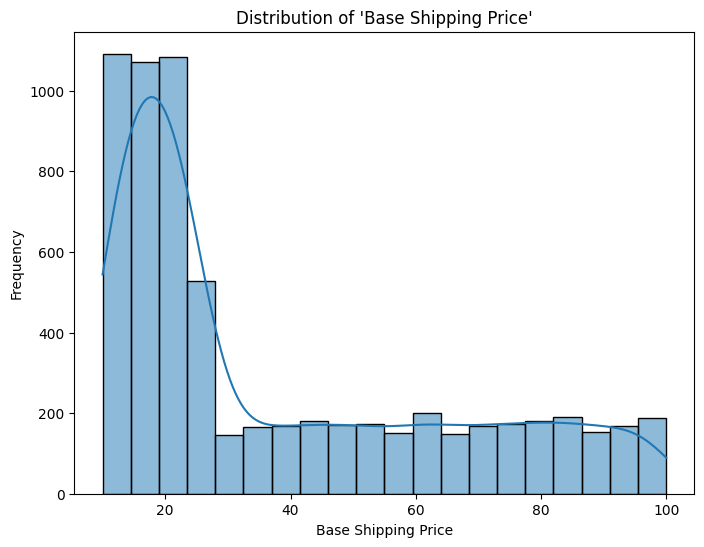

Value counts for column 'International':
No     4294
Yes    2206
Name: International, dtype: int64


Value counts for column 'Express Shipment':
No     4365
Yes    2135
Name: Express Shipment, dtype: int64


Value counts for column 'Installation Included':
No     3916
Yes    2584
Name: Installation Included, dtype: int64


Value counts for column 'Transport':
Roadways     2064
Airways      1817
Waterways    1227
Name: Transport, dtype: int64


Value counts for column 'Fragile':
No     5461
Yes    1039
Name: Fragile, dtype: int64


Value counts for column 'Customer Information':
Working Class    4803
Wealthy          1697
Name: Customer Information, dtype: int64


Value counts for column 'Remote Location':
No     4594
Yes    1135
Name: Remote Location, dtype: int64




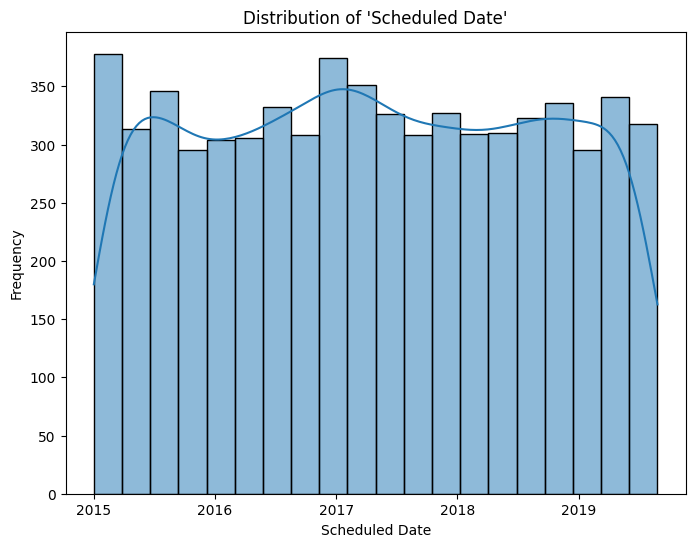

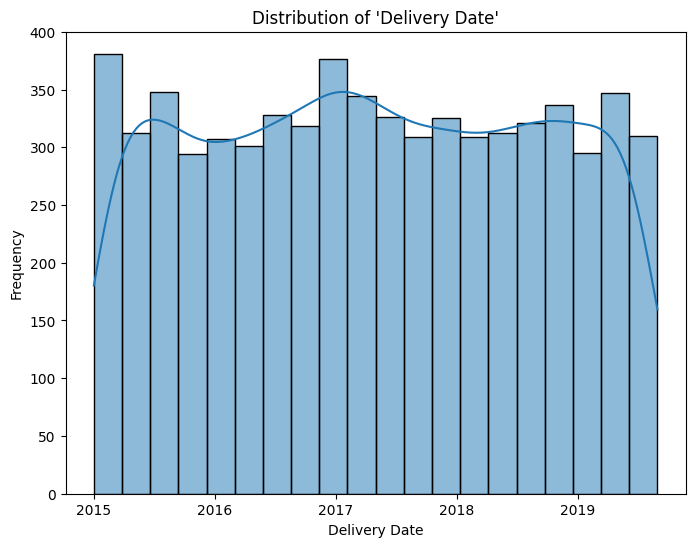

Value counts for column 'Customer Location':
New Michelle, OH 50777          1
Lake Johnny, MI 27289           1
East Emily, NY 91585            1
Brittneyview, PA 95720          1
Dominguezchester, KY 97127      1
                               ..
Karenmouth, WY 67680            1
Wilsontown, NY 95913            1
New Stephanieport, HI 74286     1
South Mitchellside, WV 80906    1
New Christopher, AK 87406       1
Name: Customer Location, Length: 6500, dtype: int64




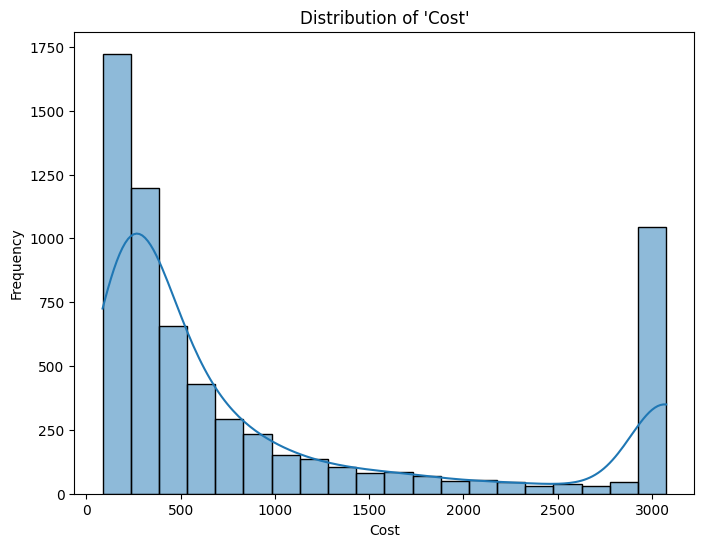

In [31]:
#aftre removinng outlier
distribution_outlier.Distribution(train_df1)

##preprocessing

In [32]:
class DataPreprocessing:
    def __init__(self):
        pass

    def Cleaning_Dataset(self, df):
        cleaned_df = df.drop(['Customer Id', 'Artist Name', 'Width', 'Weight', 'Customer Location', 'Scheduled Date', 'Delivery Date'], axis=1)
        return cleaned_df

    def preprocessing(self):
        cat_pipe = Pipeline([
            ('imputation', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False))
        ])
        num_pipe = Pipeline([
            ('imputation', SimpleImputer(strategy='mean')),
            ('scaling', StandardScaler())
        ])
        num_cols = ['Artist Reputation', 'Height', 'Price Of Sculpture', 'Base Shipping Price']
        cat_cols =['Material', 'International', 'Express Shipment',
       'Installation Included', 'Transport', 'Fragile', 'Customer Information',
       'Remote Location']
        preprocessor = ColumnTransformer([
            ('cat_pipe', cat_pipe, cat_cols),
            ('num_pipe', num_pipe, num_cols)
        ], remainder='passthrough')

        return preprocessor

    def intiate_data_transformation(self, df):
        self.df = df
        x = df.drop('Cost', axis=1)
        y = df['Cost']
        train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)
        self.preprocessor = self.preprocessing()  # Fit and store the preprocessor
        train_x_transformed = self.preprocessor.fit_transform(train_x)
        test_x_transformed = self.preprocessor.transform(test_x)
        return train_x_transformed, test_x_transformed, train_y, test_y

    def test_processing(self,df):
        transformed_data = self.preprocessor.transform(df)  # Use the stored preprocessor
        return transformed_data

In [33]:
pre=DataPreprocessing()

In [34]:
train_df_1=pre.Cleaning_Dataset(train_df1)

In [35]:
train_x_transformed,test_x_transformed,train_y,test_y=pre.intiate_data_transformation(train_df_1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
train_x_transformed

array([[ 0.        ,  0.        ,  0.        , ..., -0.42016225,
        -0.66180171, -1.02009118],
       [ 0.        ,  0.        ,  0.        , ..., -0.1615468 ,
        -0.63717569, -0.66171437],
       [ 0.        ,  0.        ,  0.        , ...,  1.82117162,
         1.88602585,  0.56886108],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.0108635 ,
        -0.52189211,  1.13425058],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.33832865, -0.39756914],
       [ 0.        ,  0.        ,  0.        , ..., -0.3339571 ,
        -0.67363186, -0.62721226]])

In [37]:
train_x_transformed.shape

(4550, 18)

In [38]:
test_x_transformed

array([[ 0.        ,  0.        ,  1.        , ..., -0.07534165,
        -0.58031855, -0.73591247],
       [ 0.        ,  0.        ,  0.        , ..., -0.59257255,
        -0.64043502, -0.55078822],
       [ 0.        ,  0.        ,  0.        , ..., -0.24775195,
        -0.63693426, -0.51814105],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.76498285,
         0.02881335,  0.88531597],
       [ 0.        ,  1.        ,  0.        , ..., -0.85118799,
        -0.67664976, -0.53001275],
       [ 0.        ,  0.        ,  1.        , ..., -1.62703434,
        -0.65323089, -0.66356932]])

In [39]:
test_x_transformed.shape


(1950, 18)

##Model Training and Evaluation

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
  models = {

                "linear Regression":LinearRegression(),
                "SVR":SVR(),
                "Random Forest": RandomForestRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                "ExtraTreesRegressor":ExtraTreesRegressor(),
                "Gradient Boosting": GradientBoostingRegressor(),

                }
param_grid = {
    "linear Regression": {},
    "SVR": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "ExtraTreesRegressor": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5],
        "learning_rate": [0.01, 0.1]
    }
}


In [42]:
def model_evaluation_hypertuning(X_train, y_train, X_test, y_test, models, param_grids):
    report = {}

    for model_name, model in models.items():
        param_grid = param_grids.get(model_name, {})  # Get the parameter grid for the model
        grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_  # Get the best-tuned model
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        train_model_score = r2_score(y_train, y_train_pred)
        test_model_score = r2_score(y_test, y_test_pred)

        report[model_name] = test_model_score

    return report


In [60]:

def model_evaluation(X_train, y_train, X_test, y_test, models):
    report = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train model

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_model_score = r2_score(y_train, y_train_pred)
        test_model_score = r2_score(y_test, y_test_pred)

        report[model_name] = test_model_score
        best_model_name = max(report, key=report.get)
        best_model = models[best_model_name]



        plt.figure(figsize=(8, 6))
        plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
        plt.title(f'{model_name} - on Train data with r2 score of {train_model_score}')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
        plt.title(f'{model_name} - on Test data with r2 score of   {test_model_score}')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()

    return (report,best_model_name)

In [58]:
def model_evaluation_hypertuning(X_train, y_train, X_test, y_test, models, param_grids):
    report = {}

    for model_name, model in models.items():
        param_grid = param_grids.get(model_name, {})  # Get the parameter grid for the model
        grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_  # Get the best-tuned model
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        train_model_score = r2_score(y_train, y_train_pred)
        test_model_score = r2_score(y_test, y_test_pred)

        report[model_name] = test_model_score


    return report


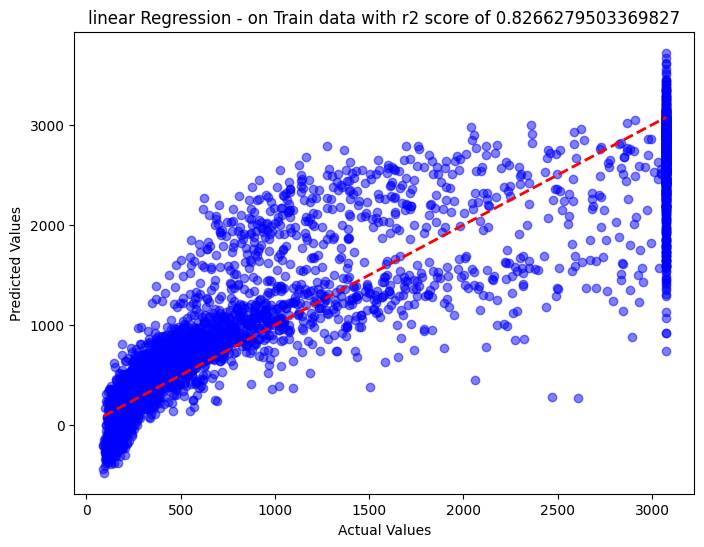

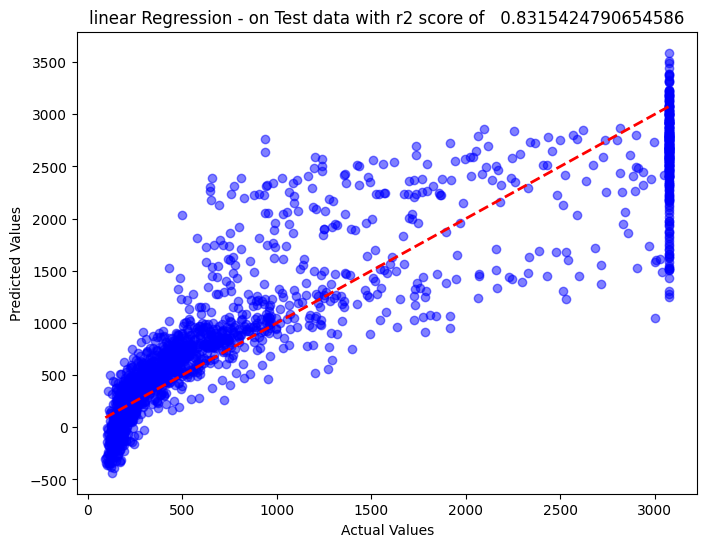

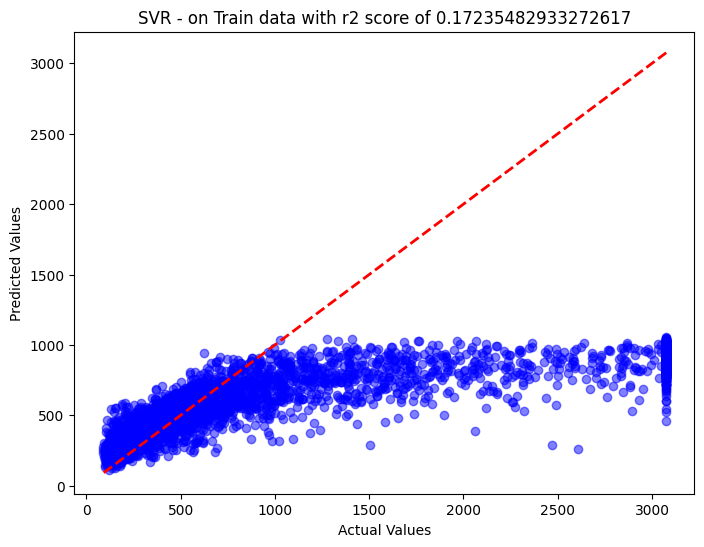

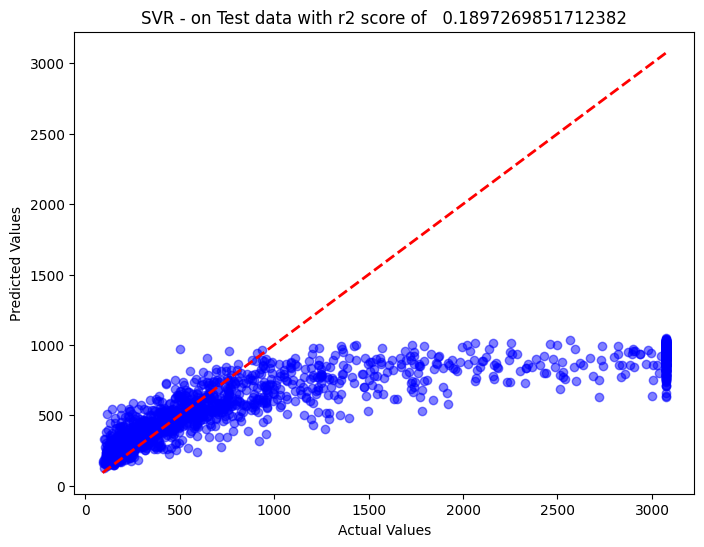

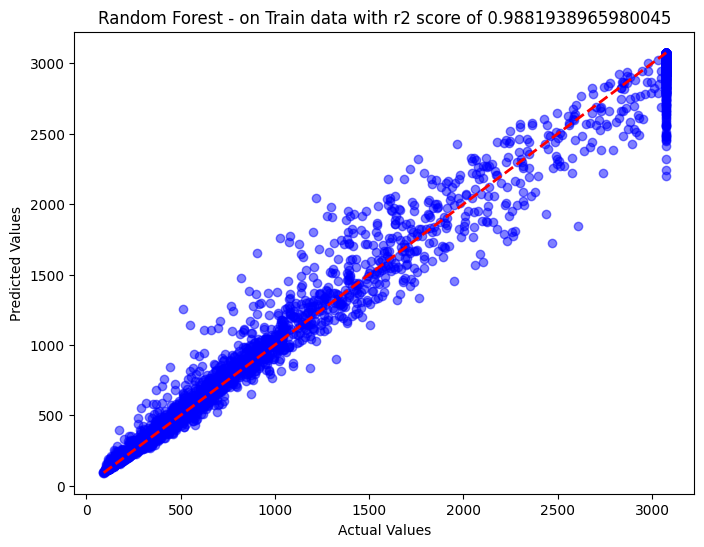

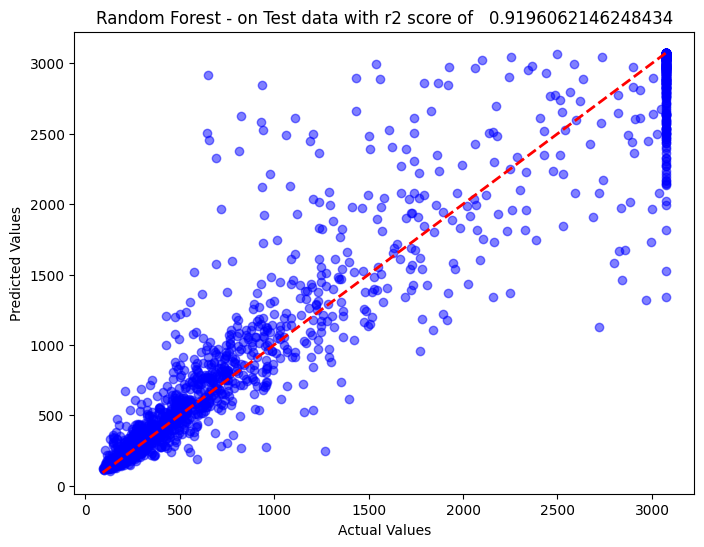

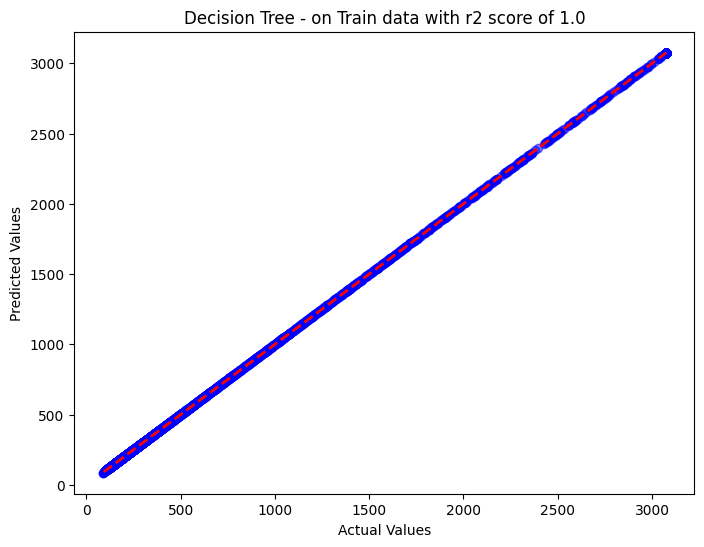

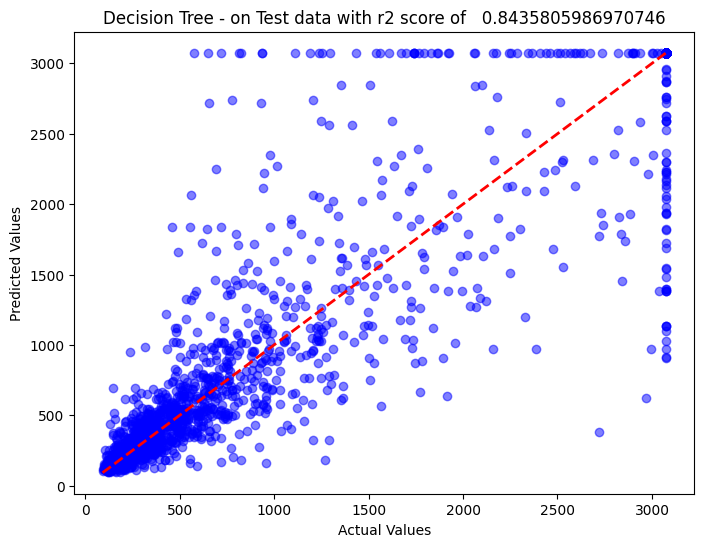

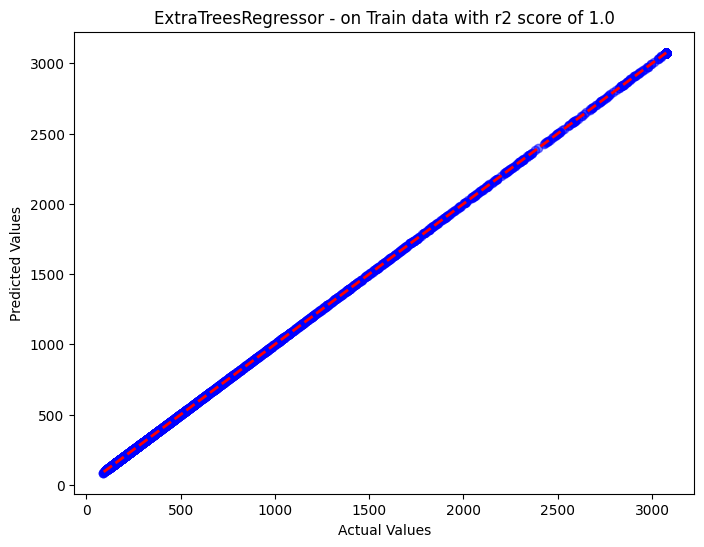

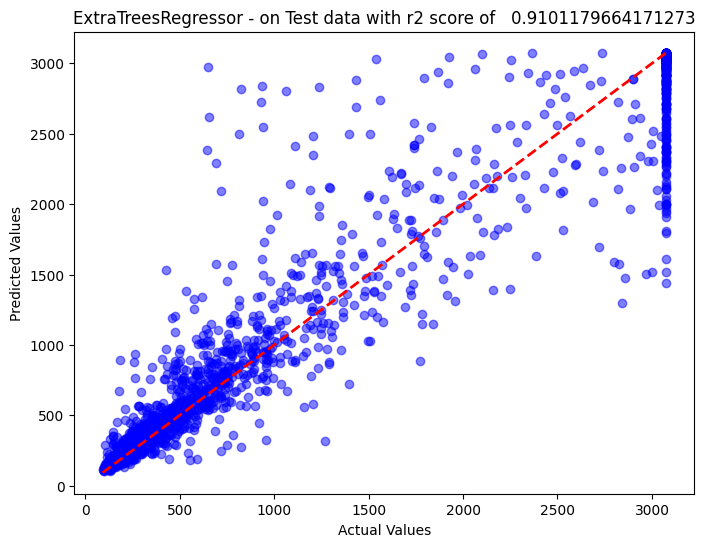

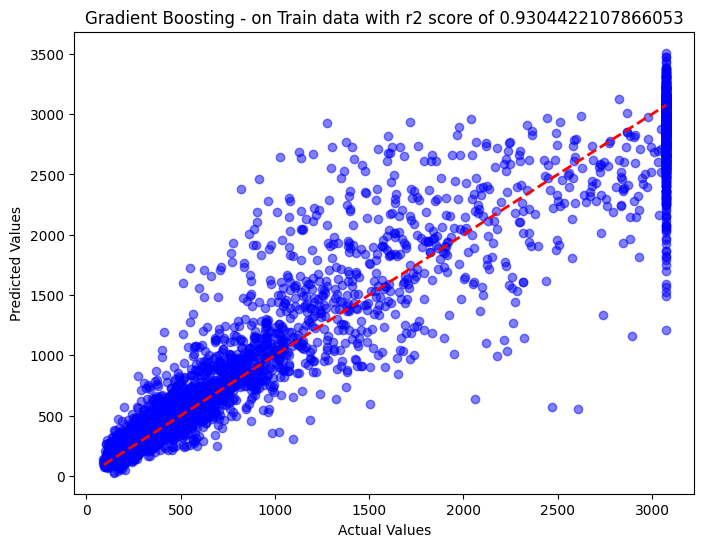

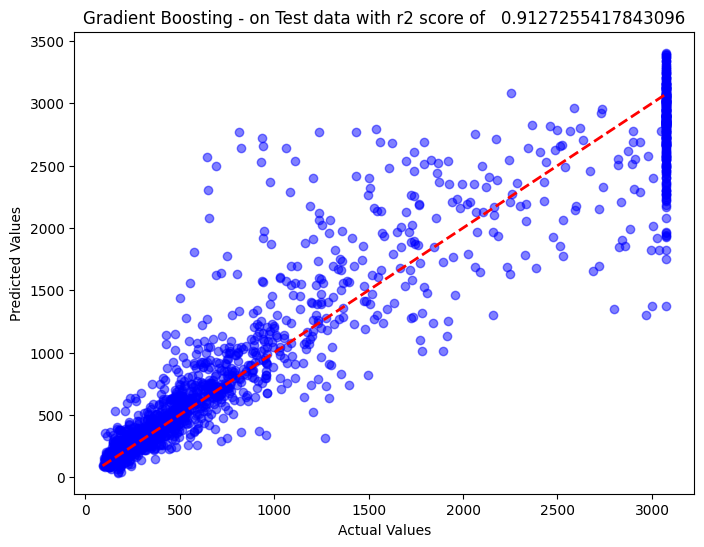

({'linear Regression': 0.8315424790654586,
  'SVR': 0.1897269851712382,
  'Random Forest': 0.9196062146248434,
  'Decision Tree': 0.8435805986970746,
  'ExtraTreesRegressor': 0.9101179664171273,
  'Gradient Boosting': 0.9127255417843096},
 'Random Forest')

In [61]:
model_evaluation(train_x_transformed,train_y,test_x_transformed,test_y,models,)




results = model_evaluation_hypertuning(train_x_transformed, train_y, test_x_transformed, test_y, models=models, param_grids=param_grid)

for model_name, test_score in results.items():  
  print(f"Model: {model_name}")
  print(f"Test R-squared Score: {test_score}")
  print("=" * 50)
  

#testing on test_data

In [47]:
test_df

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481"
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253"
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,"Antonioborough, AL 54778"
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,"Lake Frances, LA 03040"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,fffe3200300037003100,Orlando Miller,0.36,13.0,6.0,23511.0,Marble,78.01,88.70,No,Yes,No,Airways,No,Wealthy,No,02/09/16,02/09/16,"Smithville, IA 22615"
3496,fffe390031003100,Javier Loughry,0.72,29.0,14.0,NaN,Bronze,214.85,80.28,Yes,Yes,No,Airways,No,Wealthy,No,11/26/18,11/30/18,"Kennethstad, NE 65012"
3497,fffe3200350031003700,Lashawnda Walton,0.59,12.0,6.0,NaN,Brass,8.91,19.58,No,No,Yes,Airways,No,Working Class,No,04/01/17,04/02/17,"Lake Christian, AL 95571"
3498,fffe3100380031003000,Rita Battee,NaN,17.0,9.0,565.0,Aluminium,6.75,10.89,No,Yes,Yes,Airways,No,Wealthy,No,06/28/17,06/28/17,"West Regina, UT 49761"


In [48]:
test_df1=ChangeDatatype(df=test_df)

In [49]:
#creating instance for Distribution_Outliers() class
#distribution_outlier=Distribution_Outliers()
#pre=DataPreprocessing()

In [50]:
test_df=distribution_outlier.outliers_removal(test_df)

In [51]:
test_df=pre.Cleaning_Dataset(test_df)

In [52]:
test_df_preprocessed=pre.test_processing(test_df)

In [53]:
test_df_preprocessed

array([[ 0.        ,  0.        ,  0.        , ...,  2.68322311,
        -0.6471951 , -0.68879668],
       [ 0.        ,  0.        ,  1.        , ..., -1.28221374,
        -0.63584782, -0.87985678],
       [ 0.        ,  0.        ,  0.        , ..., -1.36841889,
        -0.66832037, -0.89247046],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.85118799,
        -0.61182537, -0.67136012],
       [ 0.        ,  0.        ,  0.        , ..., -0.42016225,
        -0.63789999, -0.99375086],
       [ 0.        ,  0.        ,  0.        , ...,  0.26947894,
         1.63756256, -0.23359135]])